In [1]:
!pip install pandas numpy matplotlib seaborn
!pip install wordcloud

##### Data Paths

In [2]:
# Path to JSON files
LISTINGS_PATH = "/Users/vivekprabu/Downloads/nano-slack-master/ShopTalk/data/*.json"
IMAGES_PATH = "/Users/vivekprabu/Downloads/nano-slack-master/ShopTalk/data/images.csv"

#LISTINGS_PATH = "/Users/mitilroy/IK/Projects/Capstone/ShopTalk/abo-listings/listings/metadata/*.json"
#IMAGES_PATH = "/Users/mitilroy/IK/Projects/Capstone/ShopTalk/abo-images-small/images/metadata/images.csv"


## Data Preparation
Extract and Merge Product Listings with Image Data

In [3]:
import pandas as pd
import glob
import json

json_files = glob.glob(LISTINGS_PATH)

dfs = []

for f in json_files:
    with open(f, 'r') as file:
        for line in file:  # Read line by line to handle multiple JSON objects
            data = json.loads(line.strip())  # Parse each JSON object separately
            
            extracted_data = {}  # Store extracted values
            
            # Loop through each key in the JSON object
            for key, value in data.items():
                if isinstance(value, list):  # Only process lists
                    for item in value:
                        if isinstance(item, dict) and "language_tag" in item and item["language_tag"].startswith("en_"):
                            extracted_data[key] = item["value"]  # Store the corresponding value
                        elif isinstance(item, dict) and "language_tag" not in item and "value" in item:
                            extracted_data[key] = item["value"]
                else:
                    extracted_data[key] = value
            
            # Convert extracted data into DataFrame
            df = pd.DataFrame([extracted_data])
            dfs.append(df)

# Combine all DataFrames
df_products = pd.concat(dfs, ignore_index=True)

# Display result
df_products.head()

,brand,bullet_point,color,item_id,item_name,item_weight,model_name,model_number,product_type,main_image_id,...,style,item_dimensions,fabric_type,product_description,item_shape,pattern,finish_type,spin_id,model_year,3dmodel_id
0,Amazon Brand - Solimo,None,Others,B07T6RZ2CM,Amazon Brand - Solimo Designer Couples Sitting...,50.0,Lenovo K4 Note,gz8115-SL40423,CELLULAR_PHONE_CASE,71dZhpsferL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Amazon Brand - Solimo,No Warranty,others,B07T2JY31Y,Amazon Brand - Solimo Designer Leaf on Wood 3D...,50.0,Sony Xperia Z1 L39H,gz8056-SL40528,CELLULAR_PHONE_CASE,71vX7qIEAIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Stone & Beam,NaN,NaN,B0849YGSCZ,Stone & Beam Contemporary Doily Wool Farmhouse...,NaN,NaN,I59I8044IVYGRYC00-Parent,HOME_FURNITURE_AND_DECOR,A1EZF-2mB5L,...,Contemporary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amazon Brand - Solimo,"Color: Multicolor including green, blue, and p...",Multicolor,B081K6TCML,Amazon Brand - Solimo Plastic Multipurpose Mod...,2850.0,NaN,sol_cujo_13,HOME,81o9EyZ-fAL,...,NaN,{'height': {'normalized_value': {'unit': 'inch...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amazon Brand - Solimo,Extreme precision design allows easy access to...,Multicolor,B0854774X5,Amazon Brand - Solimo Designer Take It Easy UV...,50.0,Nokia 8.1,UV10714-SL40617,CELLULAR_PHONE_CASE,81xaJCVnl3L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Rename main_image_id to image_id
df_products.rename(columns={"main_image_id": "image_id"}, inplace=True)

In [5]:
df_images = pd.read_csv(IMAGES_PATH)
df_images.head()

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg


In [6]:
# rename path to image_path
df_images.rename(columns={"path": "image_path"}, inplace=True)

In [7]:
df_product_image_merged = pd.merge(df_products, df_images, on="image_id", how="outer")
df_product_image_merged.head()

,brand,bullet_point,color,item_id,item_name,item_weight,model_name,model_number,product_type,image_id,...,product_description,item_shape,pattern,finish_type,spin_id,model_year,3dmodel_id,height,width,image_path
0,NaN,NaN,NaN,B07Y7M8LV7,NaN,NaN,NaN,NaN,KITCHEN,010-mllS7JL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,106.0,14/14fe8812.jpg
1,NaN,NaN,NaN,B07Y7M4JZ2,NaN,NaN,NaN,NaN,KITCHEN,01dkn0Gyx0L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.0,122.0,da/daab0cad.jpg
2,NaN,NaN,NaN,B07ZTFRVTT,NaN,NaN,NaN,NaN,KITCHEN,01sUPg0387L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,111.0,d2/d2daaae9.jpg
3,NaN,NaN,NaN,B07ZTFC41S,NaN,NaN,NaN,NaN,KITCHEN,1168jc-5r1L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.0,186.0,3a/3a4e88e6.jpg
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11RUV5Fs65L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,500.0,d9/d91ab9cf.jpg


In [8]:
df_product_image_merged.shape

(422403, 28)

In [9]:
df_product_image_merged.isna().sum()

brand                  303815
bullet_point           308922
color                  323885
item_id                274701
item_name              299669
item_weight            316209
model_name             347729
model_number           298312
product_type           274701
image_id                  575
item_keywords          314835
country                274701
marketplace            274701
domain_name            274701
material               375463
style                  391998
item_dimensions        379065
fabric_type            416850
product_description    420398
item_shape             418460
pattern                418928
finish_type            421048
spin_id                414181
model_year             414638
3dmodel_id             414443
height                    575
width                     575
image_path                575
dtype: int64

In [10]:
## of this Item ID is the most important identifier - we cannot retrieve any product without item id. So we will drop anything with Item ID as null
df_merged_non_null_item_id = df_product_image_merged.dropna(subset=['item_id'])
print(df_merged_non_null_item_id.shape)
df_merged_non_null_item_id.head()

(147702, 28)


,brand,bullet_point,color,item_id,item_name,item_weight,model_name,model_number,product_type,image_id,...,product_description,item_shape,pattern,finish_type,spin_id,model_year,3dmodel_id,height,width,image_path
0,NaN,NaN,NaN,B07Y7M8LV7,NaN,NaN,NaN,NaN,KITCHEN,010-mllS7JL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,106.0,14/14fe8812.jpg
1,NaN,NaN,NaN,B07Y7M4JZ2,NaN,NaN,NaN,NaN,KITCHEN,01dkn0Gyx0L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.0,122.0,da/daab0cad.jpg
2,NaN,NaN,NaN,B07ZTFRVTT,NaN,NaN,NaN,NaN,KITCHEN,01sUPg0387L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,111.0,d2/d2daaae9.jpg
3,NaN,NaN,NaN,B07ZTFC41S,NaN,NaN,NaN,NaN,KITCHEN,1168jc-5r1L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.0,186.0,3a/3a4e88e6.jpg
6,NaN,NaN,NaN,B07ZT8VS6F,NaN,NaN,NaN,NaN,AV_FURNITURE,11Y+Xpt1lfL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,196.0,99/9987a1c8.jpg


In [11]:
df_merged_non_null_item_id.isna().sum()

brand                   29114
bullet_point            34221
color                   49184
item_id                     0
item_name               24968
item_weight             41508
model_name              73028
model_number            23611
product_type                0
image_id                  575
item_keywords           40134
country                     0
marketplace                 0
domain_name                 0
material               100762
style                  117297
item_dimensions        104364
fabric_type            142149
product_description    145697
item_shape             143759
pattern                144227
finish_type            146347
spin_id                139480
model_year             139937
3dmodel_id             139742
height                    575
width                     575
image_path                575
dtype: int64

In [12]:
df_merged = df_merged_non_null_item_id.copy()
df_merged["enhanced_product_desc"] ="Given Product description: " + df_merged["product_description"].fillna("").astype(str) \
        + ", " + df_merged["bullet_point"].fillna("").astype(str) \
        + ", brand: " + df_merged["brand"].fillna("").astype(str) \
        + ", weight: " + df_merged["item_weight"].fillna("").astype(str) \
        + ", color: " + df_merged["color"].fillna("").astype(str) \
        + ", height: " + df_merged["height"].fillna("").astype(str) \
        + ", width: " + df_merged["width"].fillna("").astype(str) \
        + ", model year: " + df_merged["model_year"].fillna("").astype(str) \
        + ", shape: " + df_merged["item_shape"].fillna("").astype(str) \
        + ", style: " + df_merged["style"].fillna("").astype(str) \
        + ", material: " + df_merged["material"].fillna("") \
        + ", product_type: " + df_merged["product_type"].fillna("").astype(str)
df_merged.head()

,brand,bullet_point,color,item_id,item_name,item_weight,model_name,model_number,product_type,image_id,...,item_shape,pattern,finish_type,spin_id,model_year,3dmodel_id,height,width,image_path,enhanced_product_desc
0,NaN,NaN,NaN,B07Y7M8LV7,NaN,NaN,NaN,NaN,KITCHEN,010-mllS7JL,...,NaN,NaN,NaN,NaN,NaN,NaN,106.0,106.0,14/14fe8812.jpg,"Given Product description: , , brand: , weight..."
1,NaN,NaN,NaN,B07Y7M4JZ2,NaN,NaN,NaN,NaN,KITCHEN,01dkn0Gyx0L,...,NaN,NaN,NaN,NaN,NaN,NaN,122.0,122.0,da/daab0cad.jpg,"Given Product description: , , brand: , weight..."
2,NaN,NaN,NaN,B07ZTFRVTT,NaN,NaN,NaN,NaN,KITCHEN,01sUPg0387L,...,NaN,NaN,NaN,NaN,NaN,NaN,111.0,111.0,d2/d2daaae9.jpg,"Given Product description: , , brand: , weight..."
3,NaN,NaN,NaN,B07ZTFC41S,NaN,NaN,NaN,NaN,KITCHEN,1168jc-5r1L,...,NaN,NaN,NaN,NaN,NaN,NaN,186.0,186.0,3a/3a4e88e6.jpg,"Given Product description: , , brand: , weight..."
6,NaN,NaN,NaN,B07ZT8VS6F,NaN,NaN,NaN,NaN,AV_FURNITURE,11Y+Xpt1lfL,...,NaN,NaN,NaN,NaN,NaN,NaN,103.0,196.0,99/9987a1c8.jpg,"Given Product description: , , brand: , weight..."


In [15]:
df_merged.isna().sum()

brand                     29114
bullet_point              34221
color                     49184
item_id                       0
item_name                 24968
item_weight               41508
model_name                73028
model_number              23611
product_type                  0
image_id                    575
item_keywords             40134
country                       0
marketplace                   0
domain_name                   0
material                 100762
style                    117297
item_dimensions          104364
fabric_type              142149
product_description      145697
item_shape               143759
pattern                  144227
finish_type              146347
spin_id                  139480
model_year               139937
3dmodel_id               139742
height                      575
width                       575
image_path                  575
enhanced_product_desc         0
dtype: int64

In [13]:
df_merged_master = df_merged.copy()
#selected_columns = ['item_id', 'item_name', 'enhanced_product_desc', 'image_path']
#df_merged_master = df_merged_master[selected_columns]
## Drop duplicates
#df_merged_master.drop_duplicates()
print("## Master DF with null values")
print(df_merged_master.isna().sum())
print("## Shape of master dataframe", df_merged_master.shape)
df_merged_master.head()

## Master DF with null values
brand                     29114
bullet_point              34221
color                     49184
item_id                       0
item_name                 24968
item_weight               41508
model_name                73028
model_number              23611
product_type                  0
image_id                    575
item_keywords             40134
country                       0
marketplace                   0
domain_name                   0
material                 100762
style                    117297
item_dimensions          104364
fabric_type              142149
product_description      145697
item_shape               143759
pattern                  144227
finish_type              146347
spin_id                  139480
model_year               139937
3dmodel_id               139742
height                      575
width                       575
image_path                  575
enhanced_product_desc         0
dtype: int64
## Shape of master dataframe 

,brand,bullet_point,color,item_id,item_name,item_weight,model_name,model_number,product_type,image_id,...,item_shape,pattern,finish_type,spin_id,model_year,3dmodel_id,height,width,image_path,enhanced_product_desc
0,NaN,NaN,NaN,B07Y7M8LV7,NaN,NaN,NaN,NaN,KITCHEN,010-mllS7JL,...,NaN,NaN,NaN,NaN,NaN,NaN,106.0,106.0,14/14fe8812.jpg,"Given Product description: , , brand: , weight..."
1,NaN,NaN,NaN,B07Y7M4JZ2,NaN,NaN,NaN,NaN,KITCHEN,01dkn0Gyx0L,...,NaN,NaN,NaN,NaN,NaN,NaN,122.0,122.0,da/daab0cad.jpg,"Given Product description: , , brand: , weight..."
2,NaN,NaN,NaN,B07ZTFRVTT,NaN,NaN,NaN,NaN,KITCHEN,01sUPg0387L,...,NaN,NaN,NaN,NaN,NaN,NaN,111.0,111.0,d2/d2daaae9.jpg,"Given Product description: , , brand: , weight..."
3,NaN,NaN,NaN,B07ZTFC41S,NaN,NaN,NaN,NaN,KITCHEN,1168jc-5r1L,...,NaN,NaN,NaN,NaN,NaN,NaN,186.0,186.0,3a/3a4e88e6.jpg,"Given Product description: , , brand: , weight..."
6,NaN,NaN,NaN,B07ZT8VS6F,NaN,NaN,NaN,NaN,AV_FURNITURE,11Y+Xpt1lfL,...,NaN,NaN,NaN,NaN,NaN,NaN,103.0,196.0,99/9987a1c8.jpg,"Given Product description: , , brand: , weight..."


In [14]:
## Dropping null item name rows - as the product recommendation should give a product name
df_merged_master.dropna(subset=['item_name'], inplace=True)
print("## Master DF with null values")
print(df_merged_master.isna().sum())
print("## Shape of master dataframe", df_merged_master.shape)
df_merged_master.head()

## Master DF with null values
brand                      4148
bullet_point               9258
color                     24218
item_id                       0
item_name                     0
item_weight               28367
model_name                48060
model_number              17327
product_type                  0
image_id                    460
item_keywords             15168
country                       0
marketplace                   0
domain_name                   0
material                  75795
style                     92329
item_dimensions           91688
fabric_type              117181
product_description      120729
item_shape               118791
pattern                  119259
finish_type              121379
spin_id                  114958
model_year               117623
3dmodel_id               115258
height                      460
width                       460
image_path                  460
enhanced_product_desc         0
dtype: int64
## Shape of master dataframe 

,brand,bullet_point,color,item_id,item_name,item_weight,model_name,model_number,product_type,image_id,...,item_shape,pattern,finish_type,spin_id,model_year,3dmodel_id,height,width,image_path,enhanced_product_desc
8,UMI,Easy to install: With a clear installation for...,NaN,B08G1FC33N,UMI by Amazon Modern Wood Cat Tree Cats Multi ...,NaN,NaN,NaN,PET_SUPPLIES,11xjmNF5TAL,...,NaN,NaN,NaN,NaN,NaN,NaN,117.0,88.0,ee/ee239f0f.jpg,"Given Product description: , Easy to install: ..."
658,AmazonBasics,From DisplayPort to HDMI only (not bi-directio...,Black,B07C74RX1X,AmazonBasics DisplayPort to HDMI A/M cable - 3...,0.170,NaN,HL-007263,COMPUTER_ADD_ON,21QA1aaQcsL,...,NaN,NaN,NaN,NaN,2016.0,NaN,160.0,160.0,1e/1e00bd6c.jpg,"Given Product description: , From DisplayPort ..."
674,Happy Belly,An Amazon brand,NaN,B07W95HYLH,"Happy Belly Water, Seltzer, 33.8 Ounce",2.275,NaN,NaN,GROCERY,21Qlz9BiTzL,...,NaN,NaN,NaN,NaN,NaN,NaN,405.0,500.0,36/36b8f278.jpg,"Given Product description: , An Amazon brand, ..."
675,Fresh,NaN,NaN,B084NV7PD9,Lemon Macaron 3ct,NaN,NaN,NaN,GROCERY,21Qlz9BiTzL,...,NaN,NaN,NaN,NaN,NaN,NaN,405.0,500.0,36/36b8f278.jpg,"Given Product description: , , brand: Fresh, w..."
676,Fresh,NaN,NaN,B084Q3PD5R,Jumbo Peanut Butter Cookie 12ct,NaN,NaN,NaN,GROCERY,21Qlz9BiTzL,...,NaN,NaN,NaN,NaN,NaN,NaN,405.0,500.0,36/36b8f278.jpg,"Given Product description: , , brand: Fresh, w..."


In [15]:
## This set is good - as we dont necessarily have to have an image in the product recommendation.
## We will start working with 20000 recs. As having 122734 recs to be processed, it will greatly increase the time required for processing

selected_columns = ['item_id', 'item_name', 'enhanced_product_desc', 'image_path']
#df_merged_master = df_merged_master[selected_columns]

df_sample = df_merged_master[selected_columns].sample(20000)
df_sample.reset_index(drop=True, inplace=True)

## Drop duplicates
df_sample.drop_duplicates()

print("## Shape of sample dataframe", df_sample.shape)
df_sample.head()

## Shape of sample dataframe (20000, 4)


,item_id,item_name,enhanced_product_desc,image_path
0,B0857KZS4V,Amazon Brand - Solimo Designer Blue Flower UV ...,"Given Product description: , Extreme precision...",38/381706ae.jpg
1,B07G4GDMRM,"AmazonBasics Sateen Fitted Sheet, 140 x 190 cm...","Given Product description: , Tumble dry on low...",92/92899b18.jpg
2,B00SXKUEIC,"Amazon Basics Small Packing Cubes, Black and G...","Given Product description: , Product Dimension...",41/41ac476d.jpg
3,B07Z6D3G66,AmazonFresh Whole Bean Coffee 32oz bundle - Co...,"Given Product description: , Roasted and packe...",2c/2ce564d4.jpg
4,B0857M4KLN,Amazon Brand - Solimo Designer Dark Flowers Ph...,"Given Product description: , None, brand: Amaz...",2c/2ca2b62c.jpg


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Data Visualizations

### 1. Top 10 Product Types

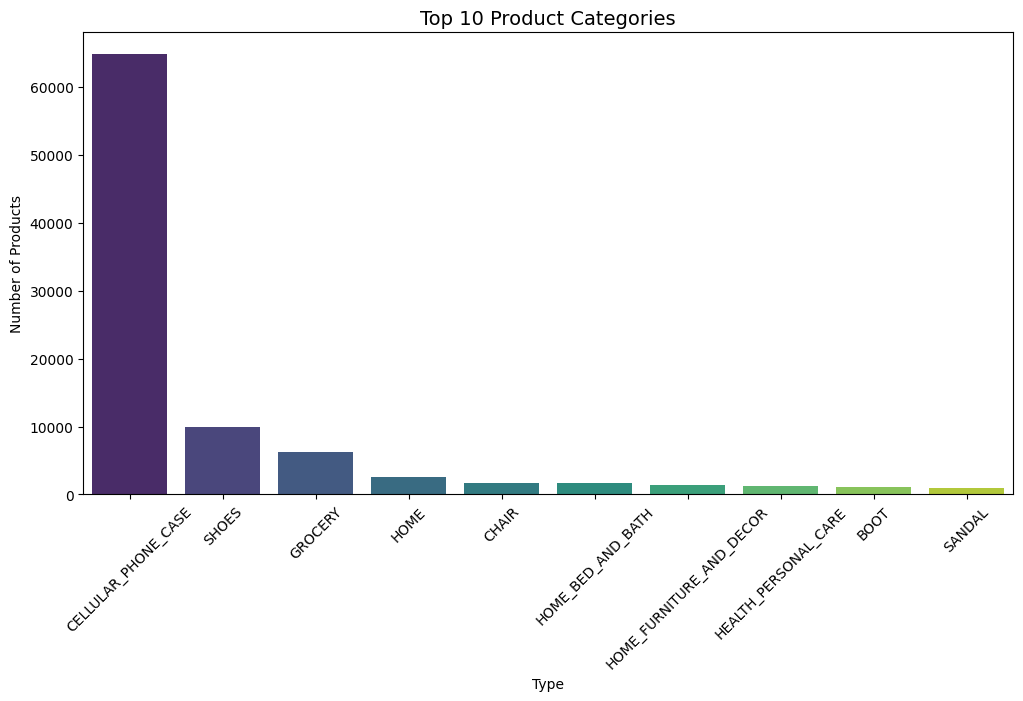

In [55]:
plt.figure(figsize=(12,6))
top_categories = df_merged_master["product_type"].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, hue=top_categories.index, palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Product Categories", fontsize=14)
plt.xlabel("Type")
plt.ylabel("Number of Products")
plt.show()

### 2. Top 10 Product brands

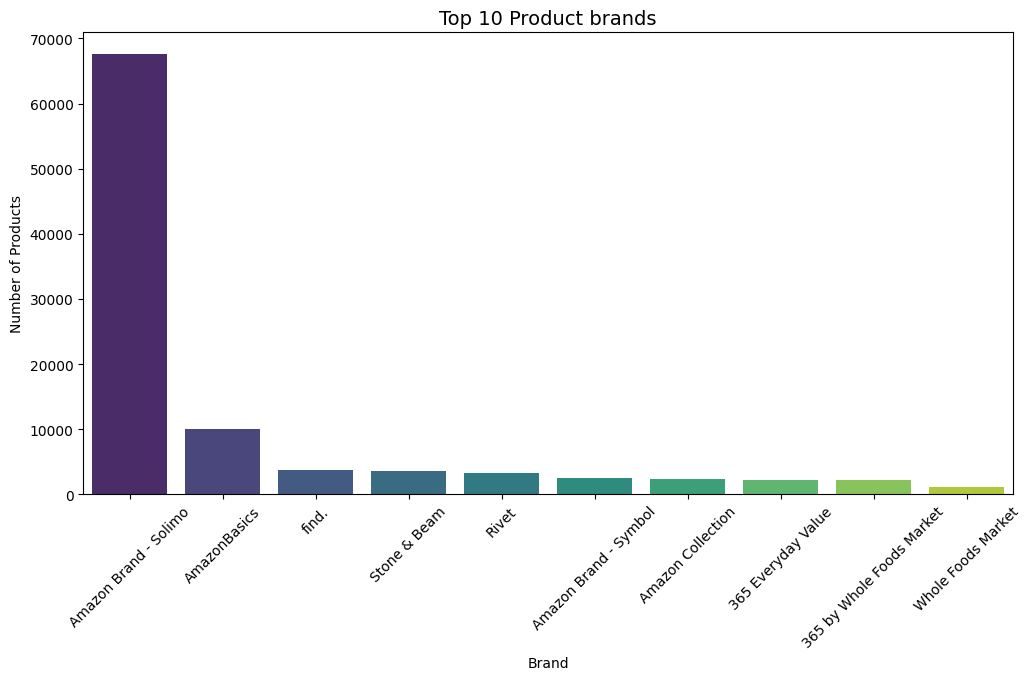

In [20]:
plt.figure(figsize=(12,6))
top_categories = df_merged_master["brand"].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, hue=top_categories.index, palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Product brands", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.show()

### 3. Number of products per country

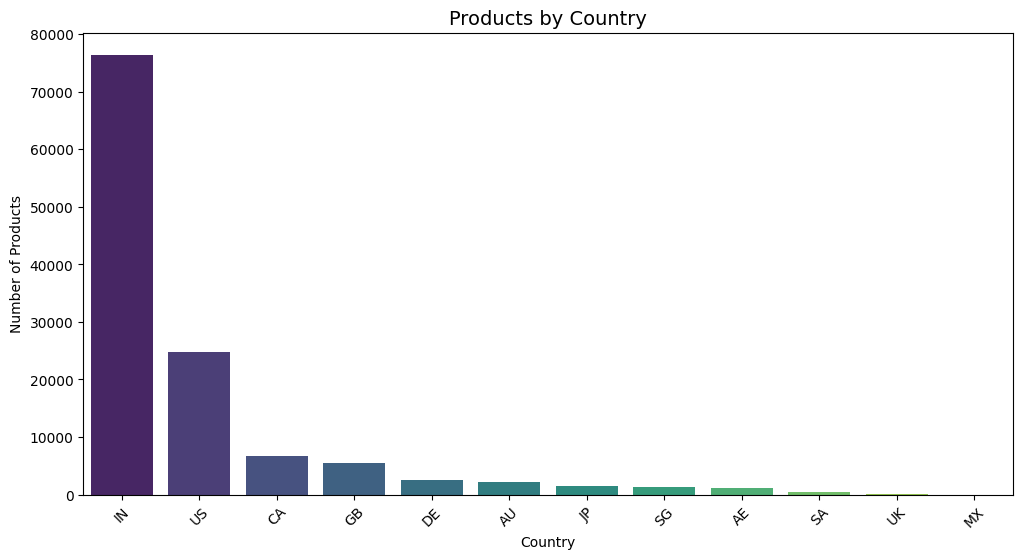

In [54]:
plt.figure(figsize=(12,6))
product_by_country = df_merged_master["country"].value_counts()
sns.barplot(x=product_by_country.index, y=product_by_country.values, hue=product_by_country.index, palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Products by Country", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Number of Products")
plt.show()

### 4. Top 5 Product Categories in each Country

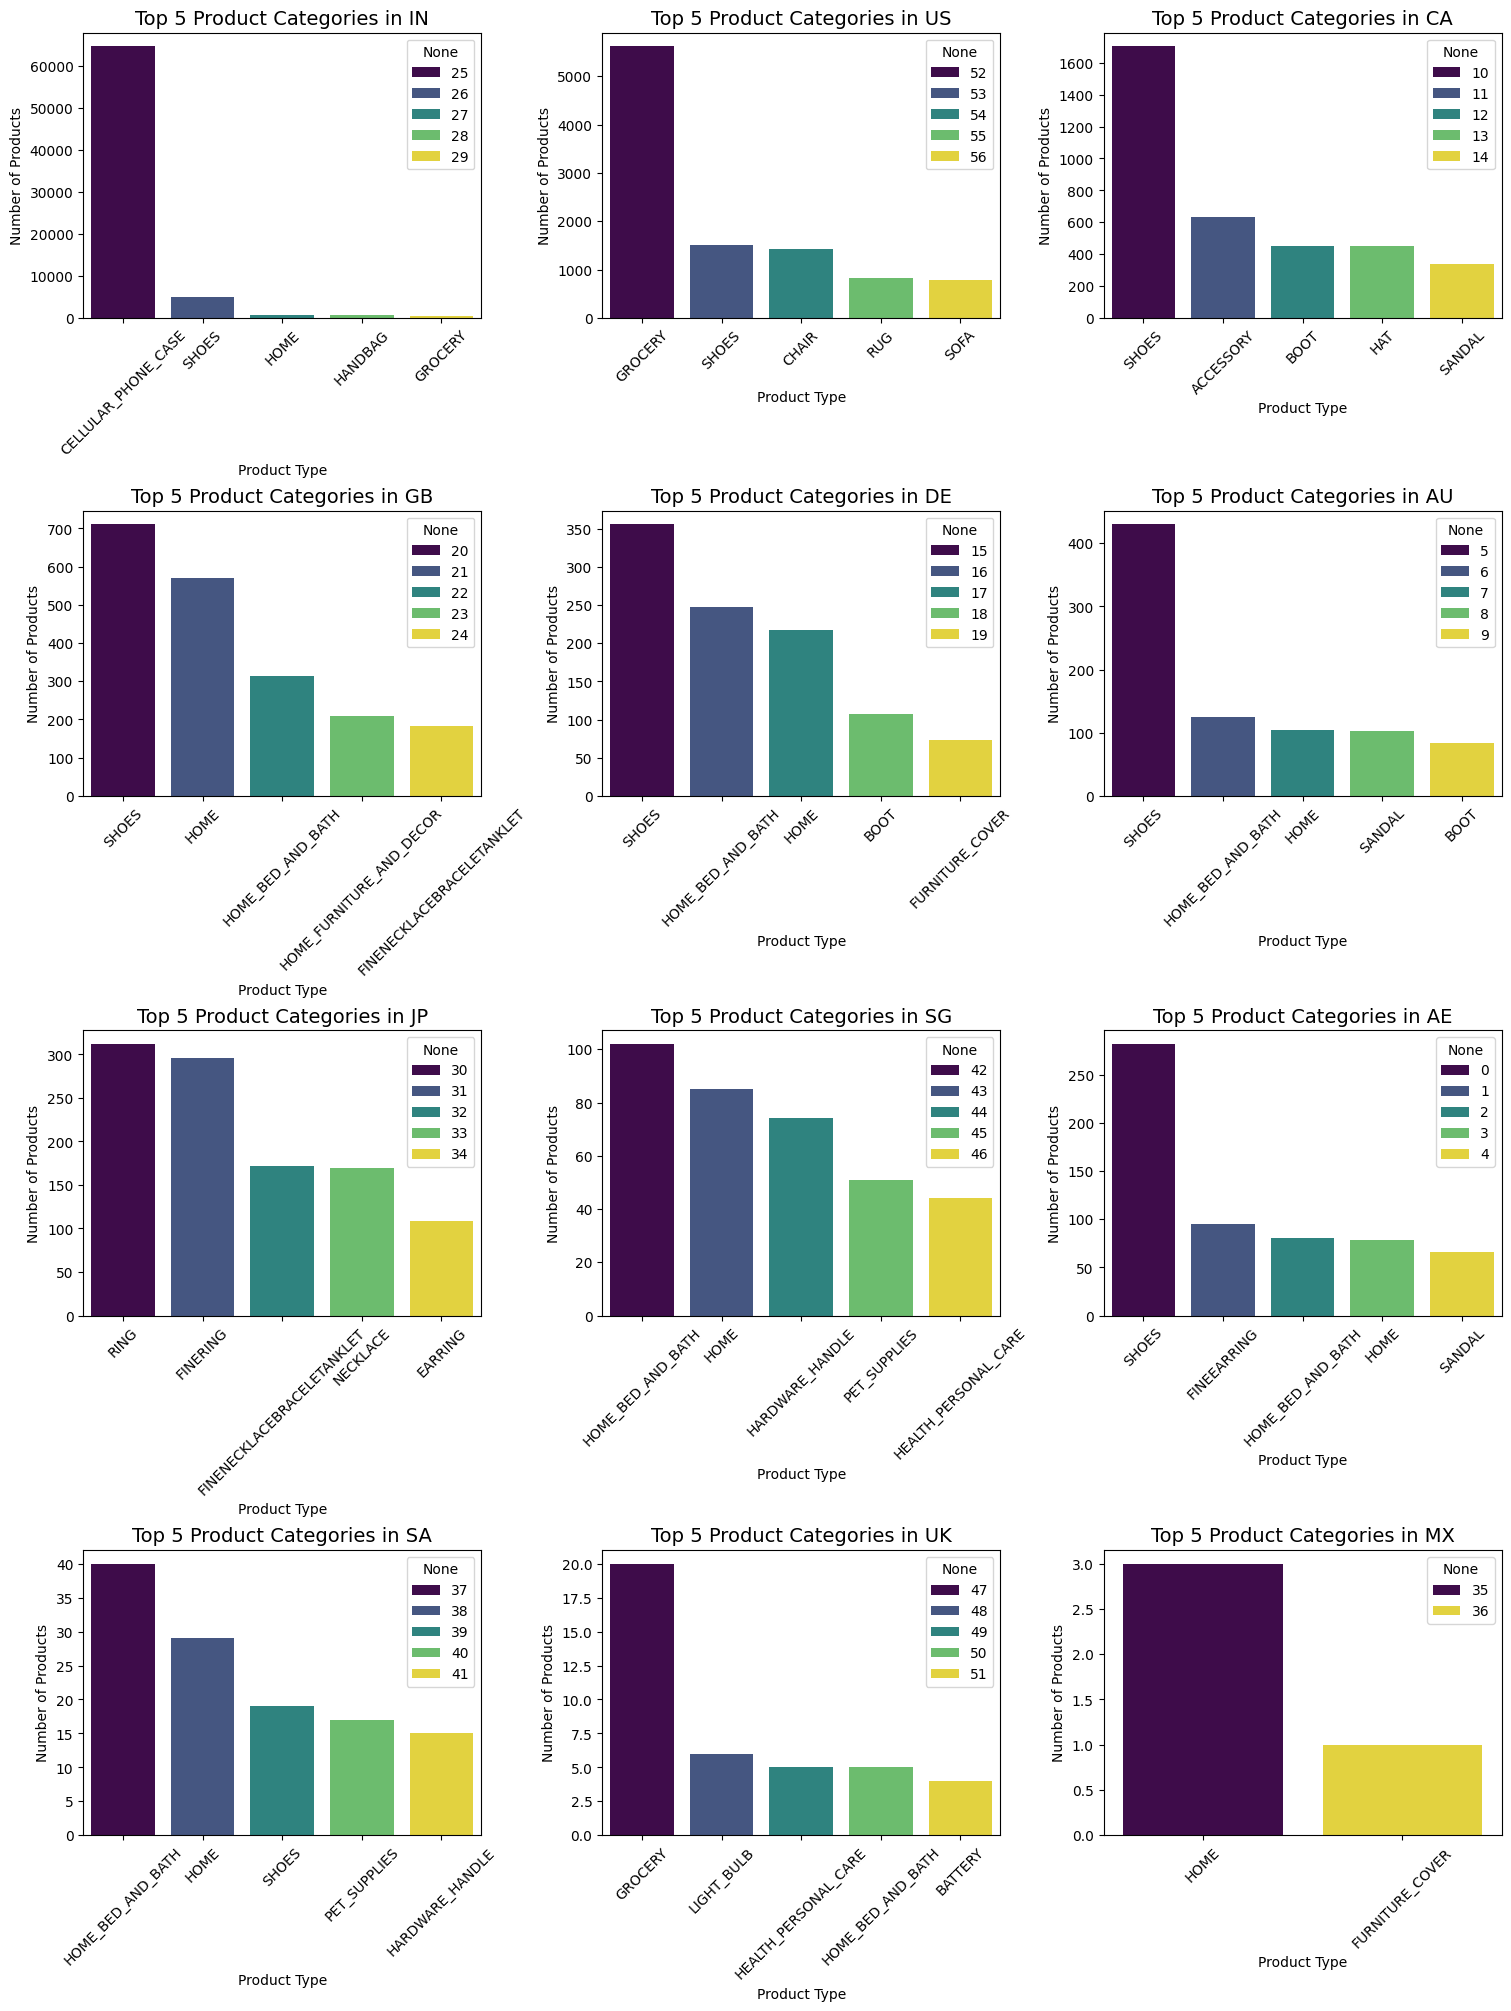

In [23]:
# For each country find the top n products.
TOP_N = 5
NUM_COLS = 3
top_products_by_country = df_merged_master.groupby("country")["product_type"].value_counts().groupby("country").head(TOP_N).reset_index(name='count')

# Order the countries by the number of products in DESCENDING order
country_order = df_merged_master["country"].value_counts().sort_values(ascending=False).index

# Determine the number of rows and columns for the grid
num_countries = len(country_order)
num_rows = (num_countries + NUM_COLS - 1) // NUM_COLS

# Create subplots
fig, axes = plt.subplots(num_rows, NUM_COLS, figsize=(15, num_rows * 5), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the top products by country
for i, country in enumerate(country_order):
    ax = axes[i]
    top_products = top_products_by_country[top_products_by_country["country"] == country]
    sns.barplot(x="product_type", y="count", data=top_products, hue=top_products.index, palette="viridis", ax=ax)
    ax.set_title(f"Top {TOP_N} Product Categories in {country}", fontsize=14)
    ax.set_xlabel("Product Type")
    ax.set_ylabel("Number of Products")
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

### 5. Word cloud for Product Description

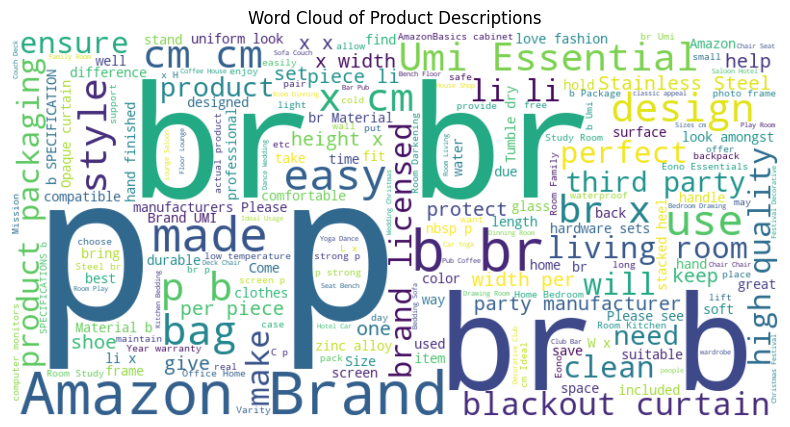

In [22]:
text = " ".join(df_merged_master["product_description"].dropna().astype(str).sample(2000))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Product Descriptions")
plt.show()

### 6. Word cloud for Product Names

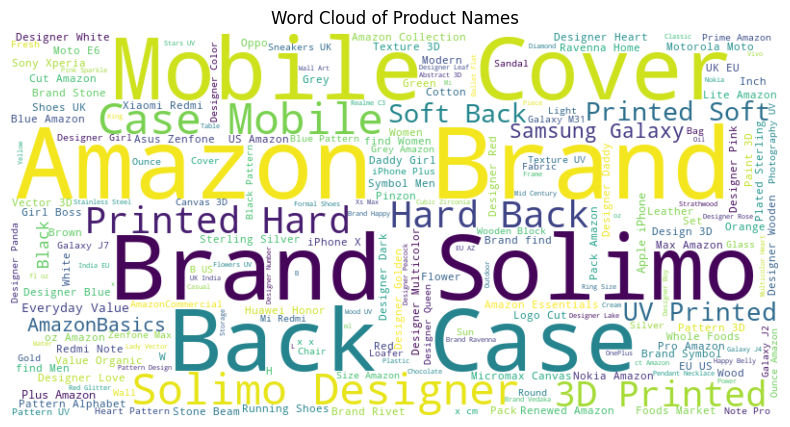

In [26]:
## 5. Word cloud for product names
text = " ".join(df_merged_master["item_name"].dropna().astype(str).sample(2000))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Product Names")
plt.show()

In [24]:
!pip install datasets

  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 8.5 MB/s eta 0:00:0000:0100:01
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached filelock-3.17.0-py3-none-any.whl (16 kB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)


In [30]:
import sys
!{sys.executable} -m pip install transformers torch

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 MB 6.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 9.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.3
    Uninstalling sympy-1.13.3:
      Successfully uninstalled sympy-1.13.3


In [19]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

# Load BLIP model
processor = BlipProcessor.from_pretrained('Salesforce/blip-image-captioning-base')
model = BlipForConditionalGeneration.from_pretrained('Salesforce/blip-image-captioning-base')
IMAGE_PATH_PREFIX = "/Users/vivekprabu/Downloads/IK-Capstone/abo-images-small/images/small/"
def generate_caption(image_path):
    if pd.isna(image_path):
        return ''
    else:
        image = Image.open(IMAGE_PATH_PREFIX + image_path).convert('RGB')
        inputs = processor(image, return_tensors='pt')
        output = model.generate(**inputs)
        return processor.decode(output[0], skip_special_tokens=True)

# Apply captioning
df_sample['image_caption'] = df_sample['image_path'].apply(generate_caption)
df_sample.head()

,item_id,item_name,enhanced_product_desc,image_path,image_caption
0,B0857KZS4V,Amazon Brand - Solimo Designer Blue Flower UV ...,"Given Product description: , Extreme precision...",38/381706ae.jpg,the blue flowers sublime sublime sublime subli...
1,B07G4GDMRM,"AmazonBasics Sateen Fitted Sheet, 140 x 190 cm...","Given Product description: , Tumble dry on low...",92/92899b18.jpg,a bed with a black sheet and white sheets
2,B00SXKUEIC,"Amazon Basics Small Packing Cubes, Black and G...","Given Product description: , Product Dimension...",41/41ac476d.jpg,the back of a black motorcycle bag
3,B07Z6D3G66,AmazonFresh Whole Bean Coffee 32oz bundle - Co...,"Given Product description: , Roasted and packe...",2c/2ce564d4.jpg,three bags of coffee on a white background
4,B0857M4KLN,Amazon Brand - Solimo Designer Dark Flowers Ph...,"Given Product description: , None, brand: Amaz...",2c/2ca2b62c.jpg,pink flowers on black phone case
